In [1]:
# Standard import(s)
import numpy as np
import csv
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

# Keras import(s)
#if float(tf.__version__[:3])>2.8:
from tensorflow.keras.utils import plot_model
#from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.layers import BatchNormalization,Input, Dense, Dropout, Flatten, Reshape, Conv2D, MaxPooling2D, Conv2DTranspose, Concatenate, Lambda, UpSampling2D
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.losses import mae
from tensorflow.keras.losses import mean_squared_error 
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.backend import set_image_data_format
from tensorflow.keras.optimizers import Adam
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()
set_image_data_format('channels_last')  # Images are formatted as (N, N, 1), with colour-channels last

# Keras import(s)
if float(tf.__version__[:3])>2.8:
    from tensorflow.keras.utils import plot_model
else:
    from tensorflow.keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, MaxPooling2D, AveragePooling2D, UpSampling2D
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, plot_confusion_matrix
from tensorflow.keras import regularizers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

import math
from sklearn import datasets, tree, metrics, model_selection, ensemble
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D
import pydotplus
import itertools
import seaborn as sns


In [2]:
#define desired columns
feats = ['lep1_pt','lep2_pt','fatjet_pt','fatjet_eta','fatjet_D2','Zll_mass','Zll_pt','MET','reco_zv_mass','isSignal']

In [3]:
fname1 = 'Top.csv'                          #background
fname2 = 'Zjets.csv'
fname3 = 'Diboson.csv'
fname4 = 'ggH1000.csv'                      #signal 
df1 =pd.read_csv(fname1)                    #read csv file into df
df2= pd.read_csv(fname2,usecols = feats)    #usecols to only read in columns that are needed
df3 =pd.read_csv(fname3)                    #read csv file into df
dfsig= pd.read_csv(fname4) 




In [4]:
#no need to drop anything from df2 since only read in select columns
df1 = df1.drop(df1.columns[0], axis=1)       #drop first column containing column numbers
df3 = df3.drop(df3.columns[0], axis=1)       
dfsig = dfsig.drop(dfsig.columns[0], axis=1)       #drop first column containing column numbers

In [5]:
dfsig.head(5)

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,0.013603,44495.770,1,87475.55,627990.80,0.116438,0.889354,675246.25,-0.851387,2.042860,...,-0.906080,-1.876361,320104.62,495510.120,-1,-1.034808,-1.631069,312638.44,1063465.80,999999.56
1,0.242178,34441.156,1,90507.31,409780.94,0.191874,1.485706,604275.70,1.041311,-0.817613,...,2.363212,2.032987,288589.78,579769.560,1,2.178999,2.466579,129548.62,974210.75,1000003.60
2,0.096412,21625.379,0,89765.85,344668.30,0.122089,1.219367,612517.94,0.417858,-2.133300,...,1.217848,0.664946,228625.23,333899.970,-1,1.695172,0.920596,118590.28,996837.40,999999.80
3,0.096373,21855.973,1,92313.63,535629.06,0.061306,0.592705,482630.90,0.438590,2.701475,...,-0.045790,-0.626280,302502.84,243535.750,1,0.293053,-0.557273,233439.89,989655.56,1000008.80
4,0.073052,33677.380,1,89451.92,296257.47,0.159334,0.724910,459737.80,1.213717,-0.926707,...,-1.289961,2.238501,224785.02,98477.516,-1,-0.747040,2.647597,76205.98,993398.30,1000011.90


In [6]:
#remove any null values
df1.dropna(inplace = True)
df2.dropna(inplace = True)
df3.dropna(inplace = True)
dfsig.dropna(inplace = True)

In [7]:
#define input feature
input_feats = ['lep1_pt','lep2_pt','fatjet_pt','fatjet_eta','fatjet_D2','Zll_mass','Zll_pt','MET']
#define input features including reco_zv_mass
new_input_feats = ['lep1_pt','lep2_pt','fatjet_pt','fatjet_eta','fatjet_D2','Zll_mass','Zll_pt','MET','reco_zv_mass']

When plotting histograms for the input features, there were very large data points that would skew the histograms making them difficult to read. Therefore, for visualisation purposes, in each iteration I calculate the mean and standard deviations of the four dataframes and plot only the data within three standard deviations of the mean.

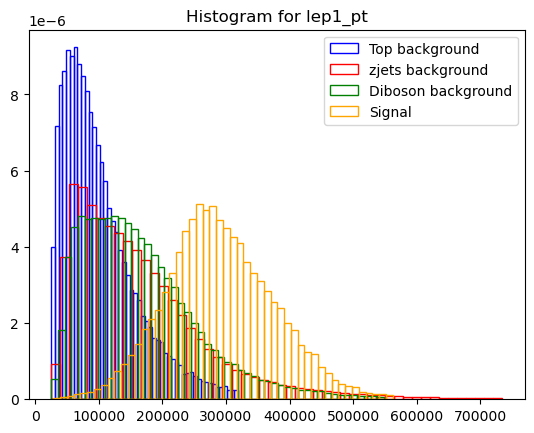

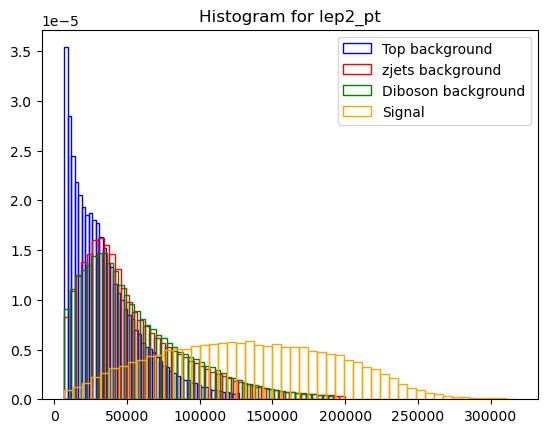

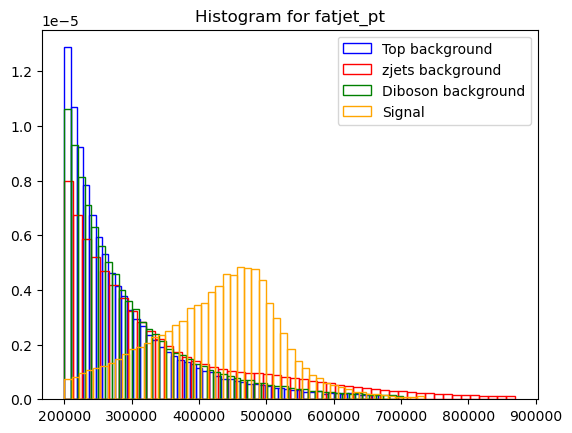

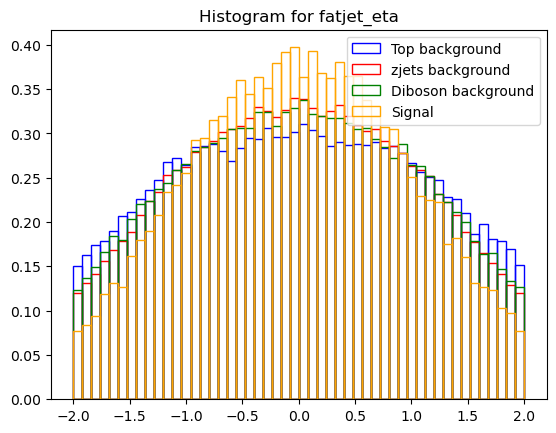

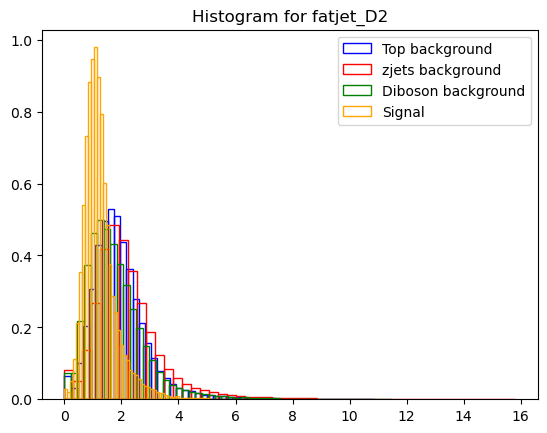

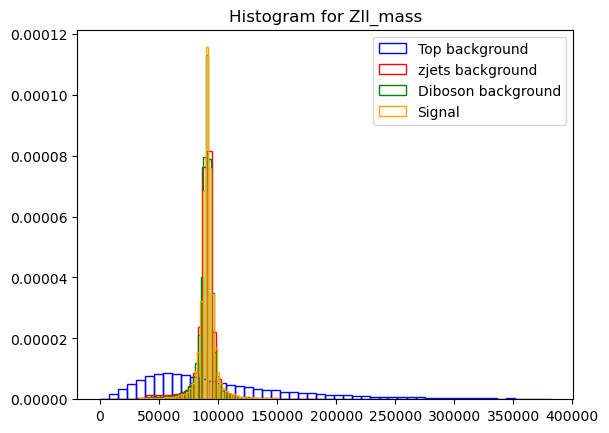

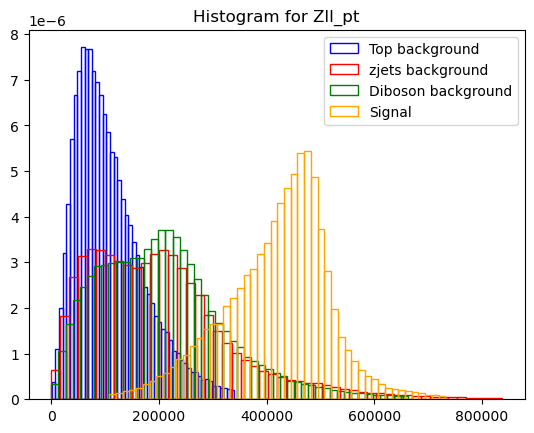

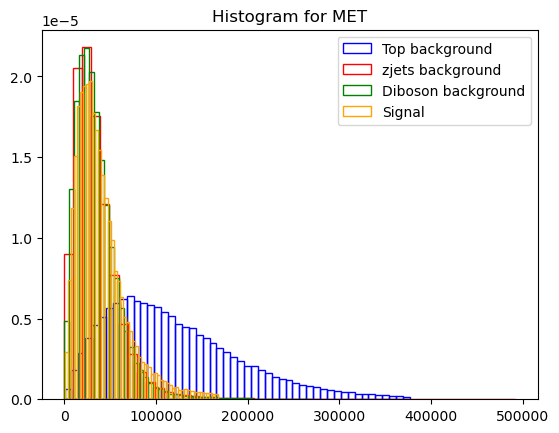

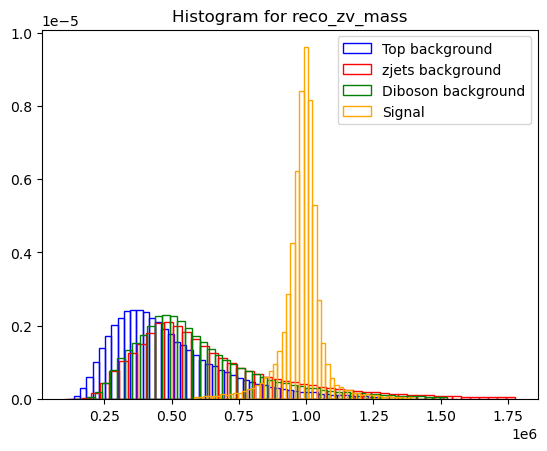

In [8]:
#iterate through input features and plot histograms 
for i in new_input_feats:
    
    #calculate means and standard deviation
    df1mean = np.mean(df1[i])
    df1std = np.std(df1[i])
    df2mean = np.mean(df2[i])
    df2std = np.std(df2[i])
    df3mean = np.mean(df3[i])
    df3std = np.std(df3[i])
    dfsigmean = np.mean(dfsig[i])
    dfsigstd = np.std(dfsig[i])
    
    plt.hist(df1[i][(df1[i]< (df1mean+3*df1std))&(df1[i]> (df1mean-3*df1std))],bins = 50,fill = False, edgecolor = 'blue',density = True,label='Top background')
    plt.hist(df2[i][(df2[i]< (df2mean+3*df2std))&(df2[i]> (df2mean-3*df2std))],bins = 50,fill = False, edgecolor = 'red',density = True,label = 'zjets background')
    plt.hist(df3[i][(df3[i]< (df3mean+3*df3std))&(df3[i]> (df3mean-3*df3std))],bins = 50,fill = False, edgecolor = 'green',density = True,label = 'Diboson background')
    plt.hist(dfsig[i][(dfsig[i]< (dfsigmean+3*dfsigstd))&(dfsig[i]> (dfsigmean-3*dfsigstd))],bins = 50,fill = False, edgecolor = 'orange',density = True, label = 'Signal')
    plt.legend()
    plt.title('Histogram for {}'.format(i))
    plt.show()

In [9]:
df1 = df1[feats]
df2 = df2[feats]
df3 = df3[feats]
df3.head(5)

,lep1_pt,lep2_pt,fatjet_pt,fatjet_eta,fatjet_D2,Zll_mass,Zll_pt,MET,reco_zv_mass,isSignal
0,369495.34,9755.2705,345940.12,-0.001591,1.786927,187549.810,374316.600,41920.540,1014320.10,0
1,36972.74,14584.7360,218057.10,-1.066937,2.296220,13106.807,51429.535,225618.530,240295.97,0
2,146895.95,19119.7030,274339.25,0.704825,3.360730,84519.230,153790.270,42284.125,471285.40,0
3,109699.72,8277.4480,444837.44,0.095546,0.702838,76138.640,102611.836,42735.938,495503.10,0
4,151453.40,13848.2230,250422.77,-1.828396,3.634348,86138.000,141886.280,70475.780,498823.40,0


In [10]:

bkg = pd.concat([df1, df2, df3],ignore_index = True) #concatenate all background dataframes


In [11]:
#shuffle data and reset the indexes
bkg = shuffle(bkg,random_state = 8)
bkg.reset_index(drop=True)
dfsig = shuffle(dfsig,random_state = 8)
dfsig.reset_index(drop = True)

,FullEventWeight,MET,Topology,Zll_mass,Zll_pt,fatjet_C2,fatjet_D2,fatjet_E,fatjet_eta,fatjet_phi,...,lep1_eta,lep1_phi,lep1_pt,lep2_E,lep2_charge,lep2_eta,lep2_phi,lep2_pt,reco_zv_mass,truth_zv_mass
0,0.108396,135044.700,0,91085.310,487172.40,0.364200,1.502308,409855.30,0.356770,0.401987,...,-0.428053,-2.699835,329522.34,185113.890,1,-0.475860,-2.310843,165965.7200,935306.60,1000013.44
1,0.073172,40519.234,1,65841.020,522368.22,0.103597,0.867879,544155.20,-0.765619,1.321751,...,-0.197990,-1.998569,516116.80,9270.583,-1,0.587791,-2.656278,7871.2324,974203.56,1000000.40
2,0.071100,46577.945,0,90265.170,232927.44,0.122690,0.795358,685836.75,1.405437,-0.746141,...,-0.883328,2.358375,203191.60,98911.150,-1,-1.615121,3.080915,37843.6000,1023960.50,1000000.00
3,0.142387,35725.746,0,90478.664,438773.16,0.112034,1.110225,1428060.00,1.577360,2.353417,...,1.674872,-1.024748,253174.69,578937.060,1,1.754519,-0.622141,194481.1100,1015753.20,1000001.40
4,0.078273,61801.633,0,77317.360,506282.12,0.206457,1.599368,754713.94,1.517663,-2.086877,...,0.869183,1.370428,310411.40,232455.270,1,0.590742,1.229972,197059.1400,863085.25,1000001.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50008,0.064645,36131.550,0,74965.440,335302.90,0.079498,0.660284,424055.60,-0.178029,1.731349,...,1.144062,-1.173557,177311.77,254859.200,1,0.998421,-1.589363,165361.2200,909990.50,999999.30
50009,0.077126,83757.140,0,92541.860,492166.88,0.140976,1.289863,1203630.80,-1.639766,1.597296,...,-1.163020,-1.328308,301139.30,382434.780,-1,-1.270834,-1.692679,198955.7700,976680.70,999988.30
50010,0.072997,11869.356,1,86926.890,519980.12,0.044524,0.478006,657492.10,-0.690237,-1.297635,...,-0.451710,2.666488,344037.16,184201.110,-1,-0.217720,2.406775,179919.9700,1002543.44,1000001.80
50011,0.070960,16635.682,1,91233.340,470119.94,0.135539,1.331416,669799.94,-0.901807,-1.267037,...,-1.747077,2.247337,258790.30,552127.250,-1,-1.578847,2.593863,218423.2200,992420.25,999999.44


In [12]:
#concatenate targets and input features and shuffle
all_data = pd.concat([dfsig,bkg[:len(dfsig)]])
all_data = shuffle(all_data,random_state = 8)


In [13]:
#create copies of input feature data and target data
data = all_data[input_feats].copy()
target = all_data['isSignal'].copy()

df = pd.concat([data, target], axis=1)


Below I use a nested for loop to iterate through pairs of input features and plot scatter plots to compare the features. The signal data points are plotted as green points and background data points are orange.

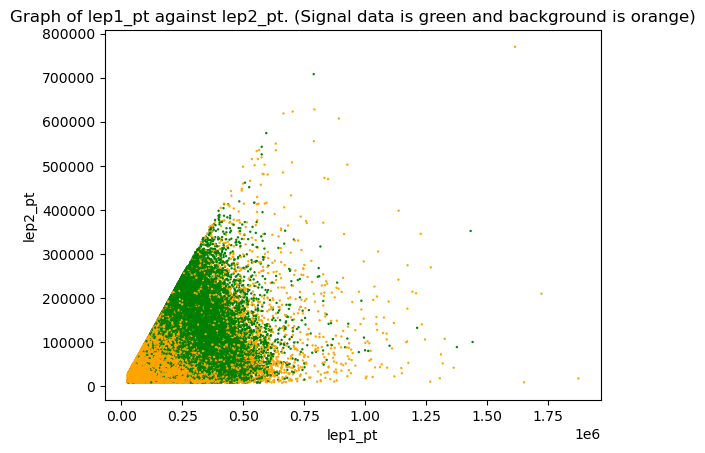

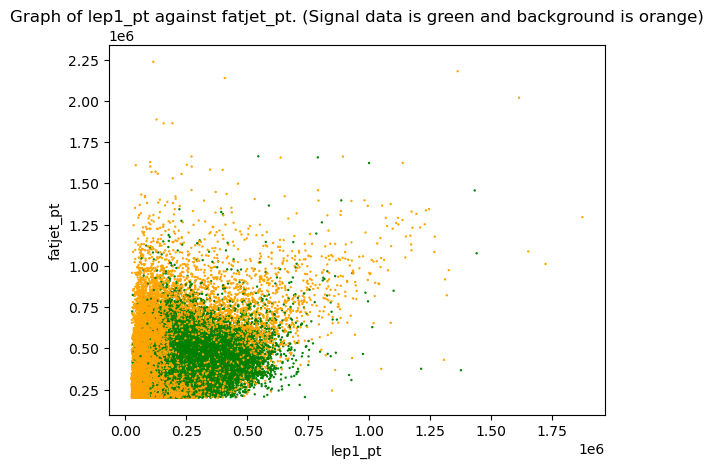

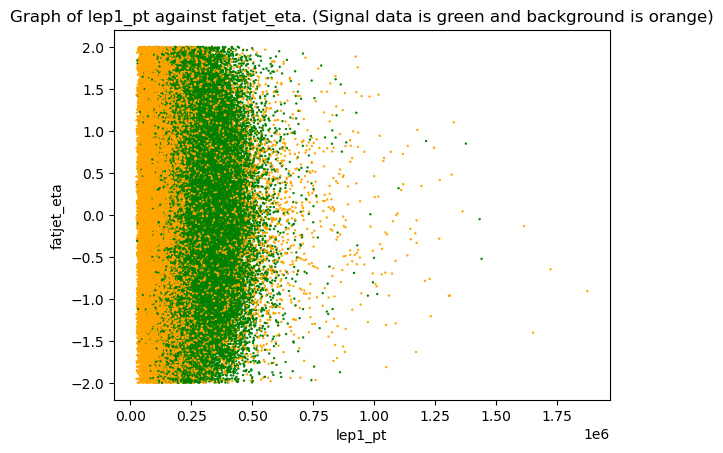

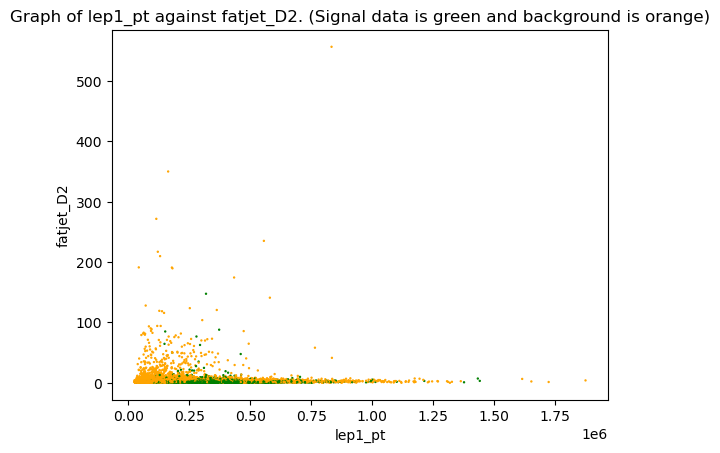

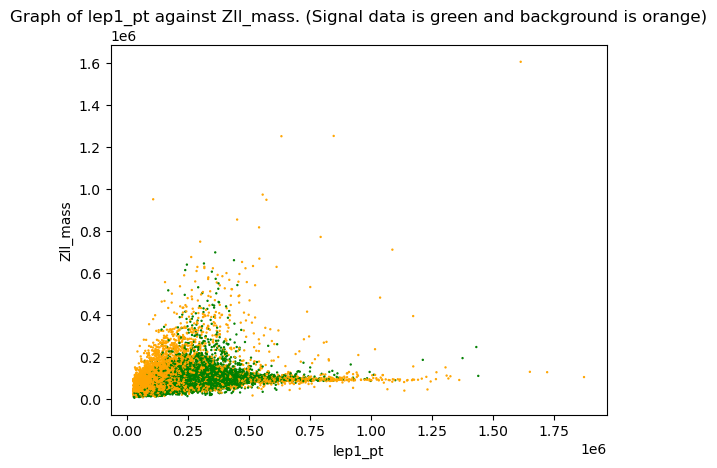

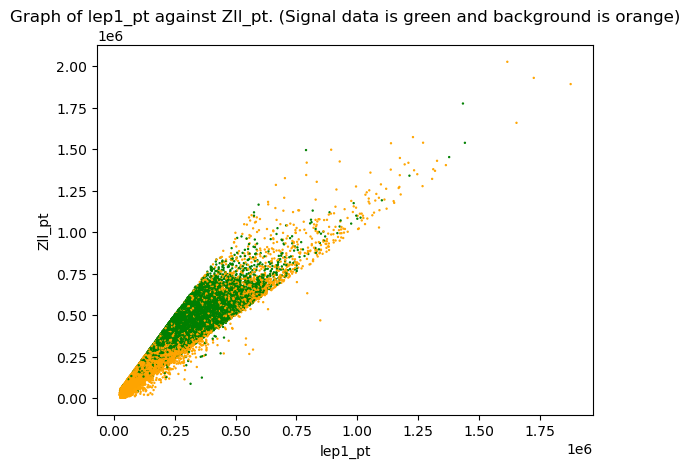

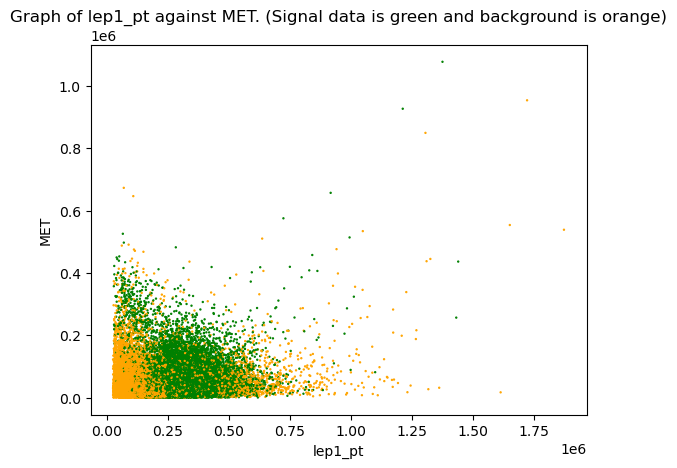

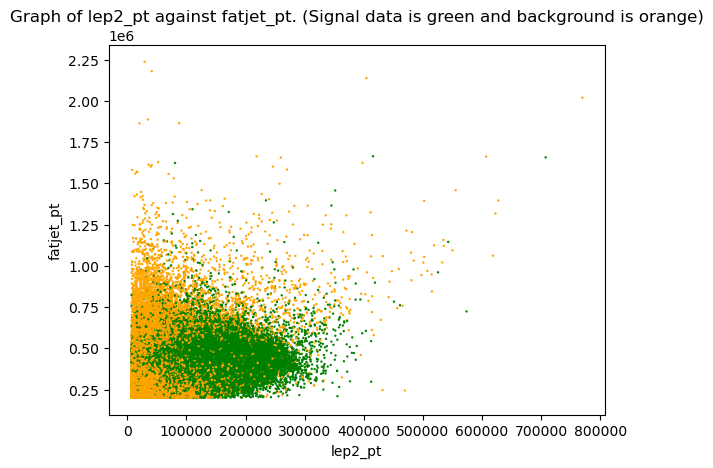

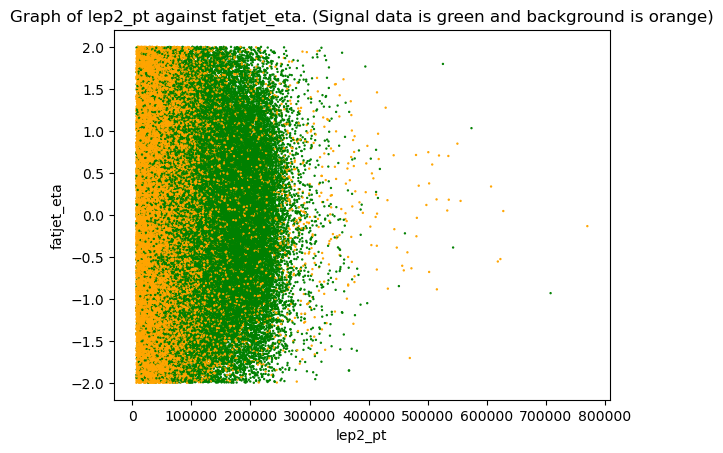

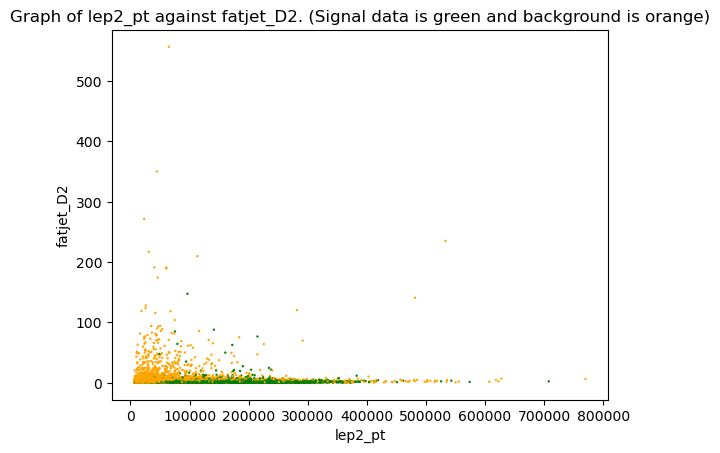

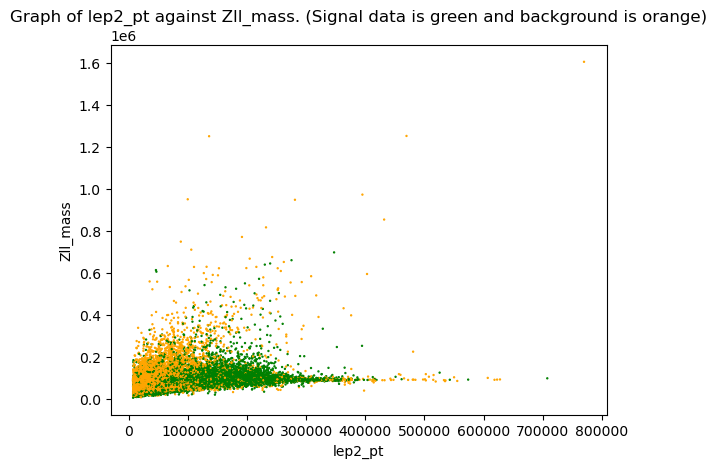

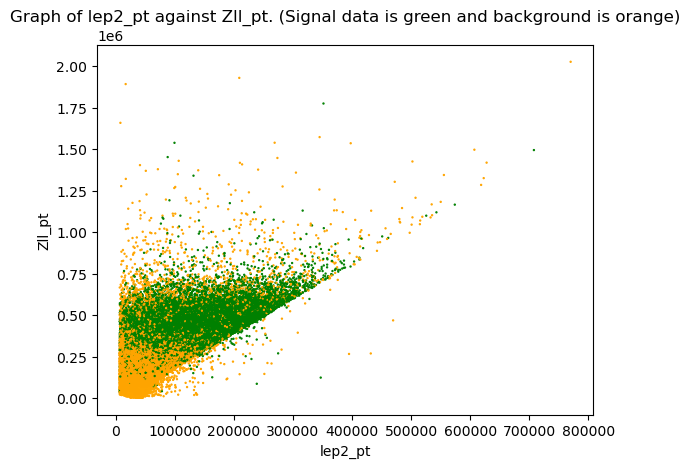

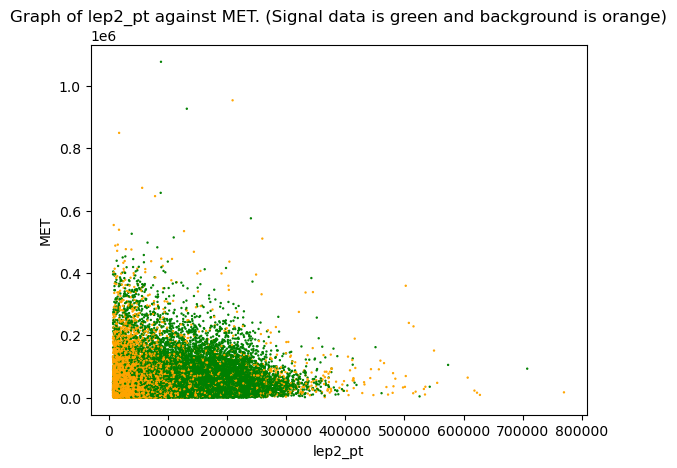

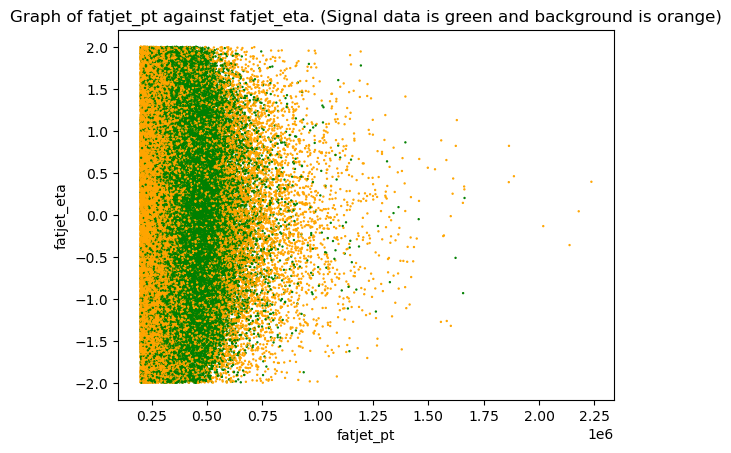

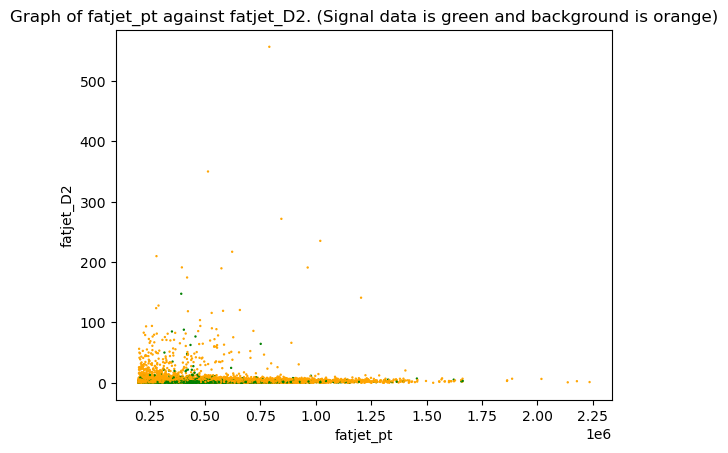

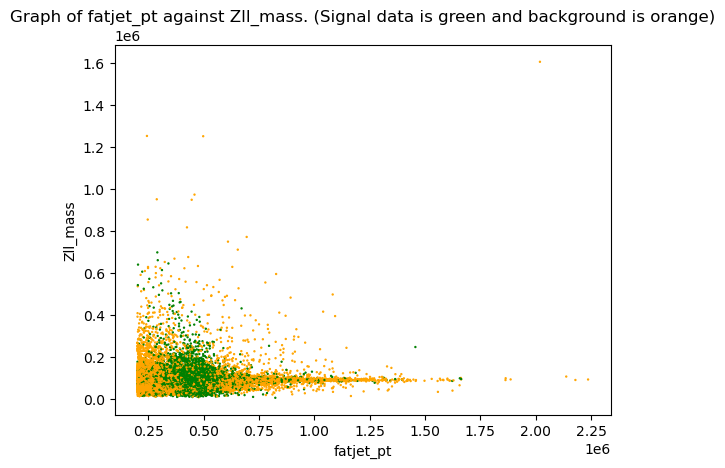

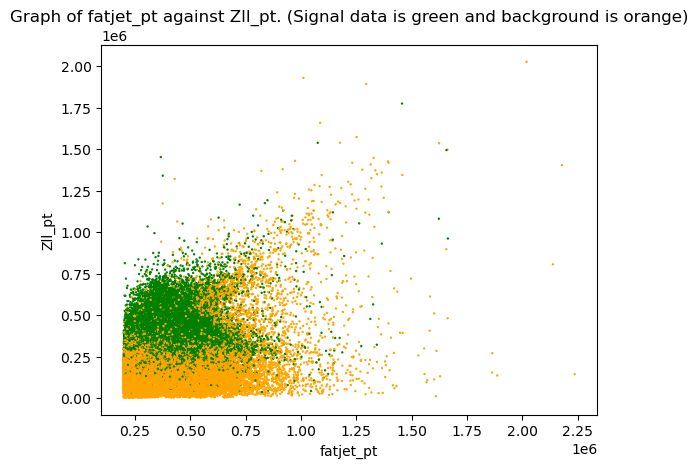

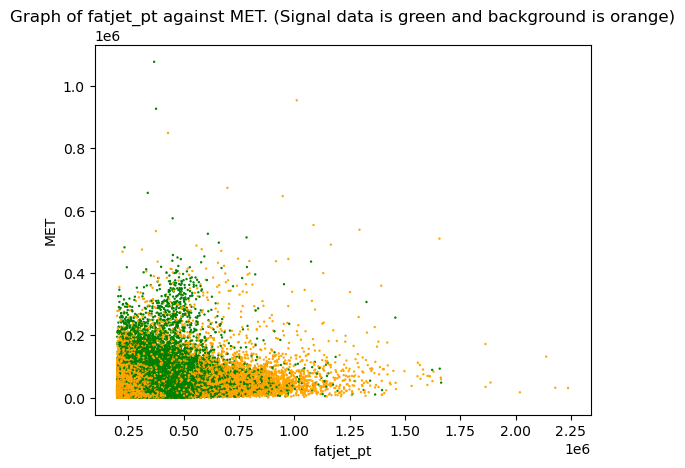

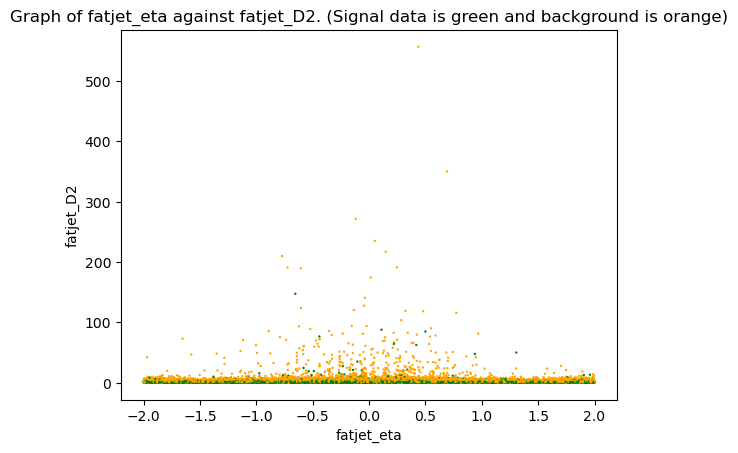

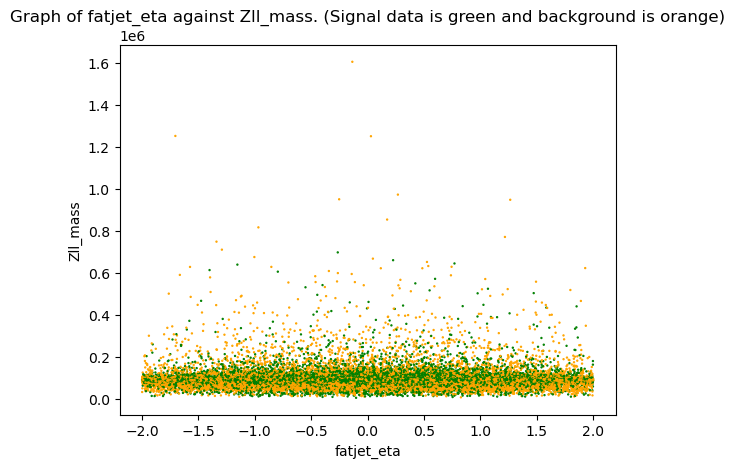

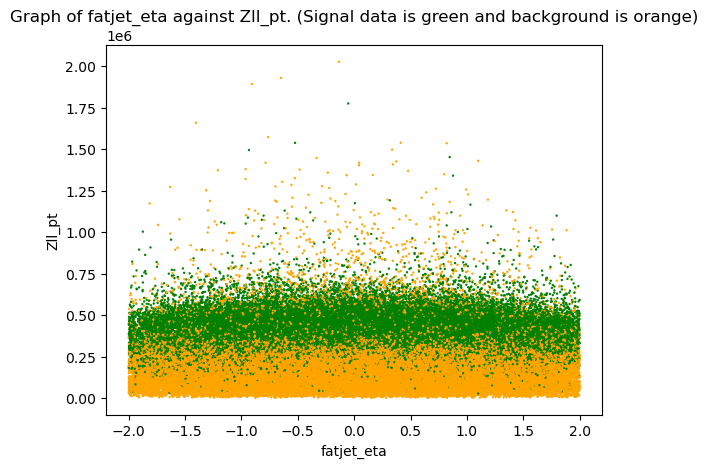

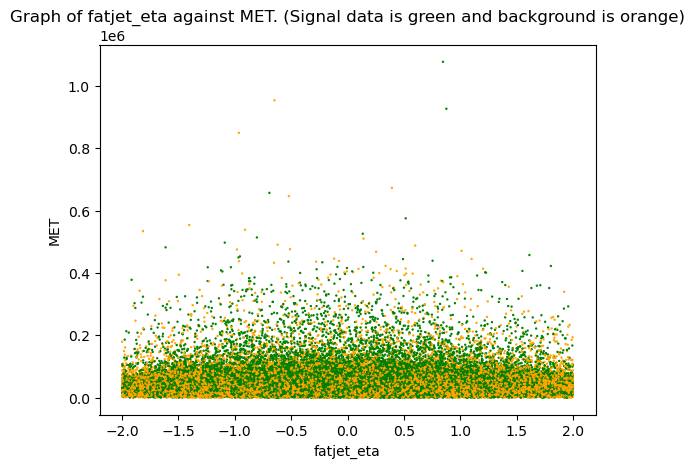

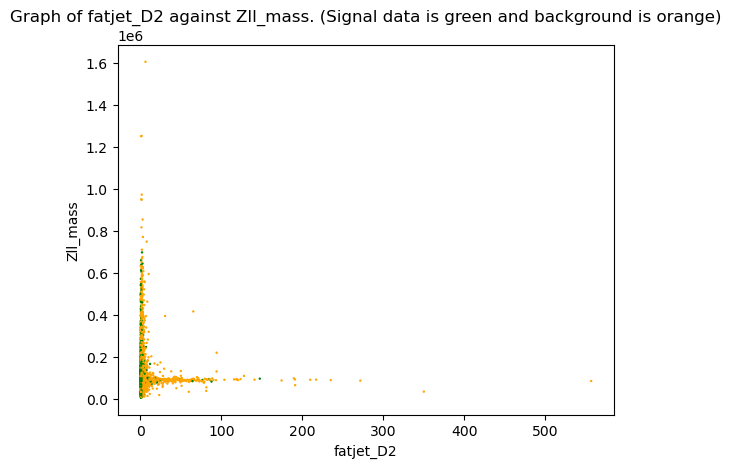

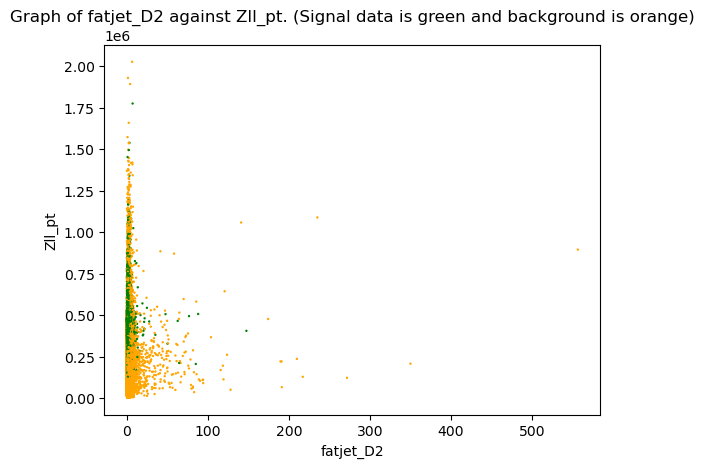

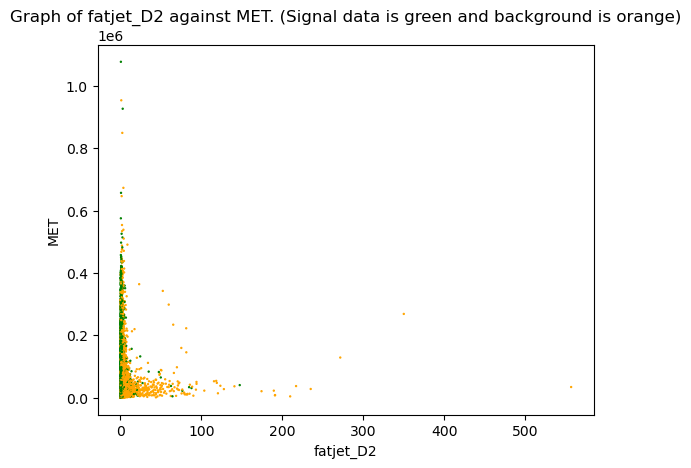

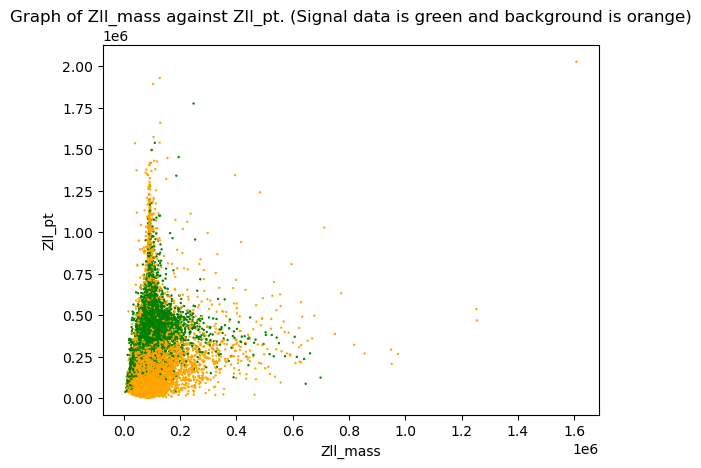

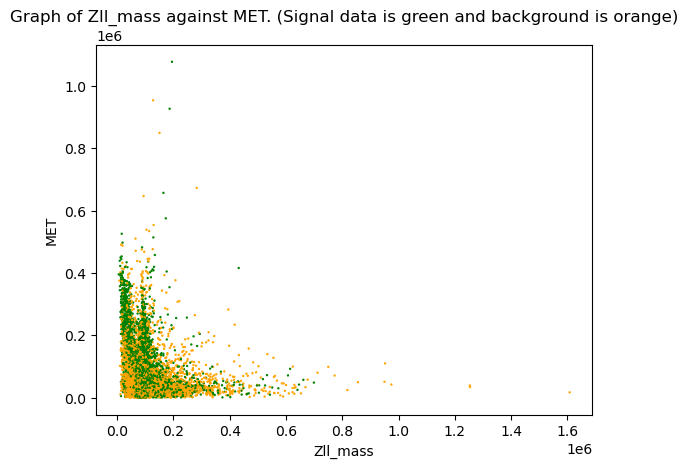

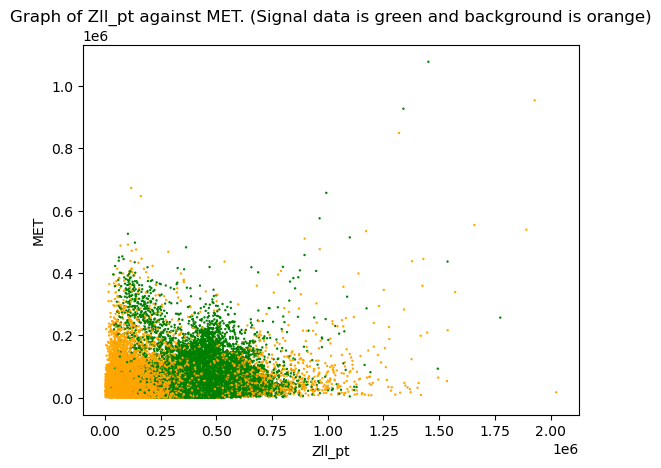

In [14]:
#nested for loop to iterate through pairs
for i in range(len(input_feats)):
    for j in range(i+1,len((input_feats))): #iterate from i+1 so that each pair is only plotted once.
        colour = np.where(all_data['isSignal'] == 1,'green','orange') #assign colours based on where data  target is signal or background
        plt.scatter(all_data[input_feats[i]],all_data[input_feats[j]],color=colour, s = 0.5)

        plt.xlabel(input_feats[i])
        plt.ylabel(input_feats[j])
        plt.title("Graph of {} against {}. (Signal data is green and background is orange)".format(input_feats[i],input_feats[j]))
        plt.show()
        

In [15]:
#preform preprocessing to scale data
sc = preprocessing.StandardScaler()
data  = sc.fit_transform (df[input_feats] )
# set random seed

Answer_to_all_questions = 42
# train - test split of dataset
train_data , test_data , train_target , test_target = model_selection.train_test_split (data ,target , test_size =0.3 , random_state = Answer_to_all_questions )
print(train_data.shape,train_target.shape ,test_data.shape ,test_target.shape )


(70018, 8) (70018,) (30008, 8) (30008,)


In [16]:
#define model with parameter or number of input feats, number of nodes and how many additional layers
def my_model(num_inputs , num_nodes , extra_depth,num_outputs = 1 ):
    # create model
    model = Sequential ()
    model.add(Dense(num_nodes, input_dim = num_inputs ,kernel_initializer ='normal',activation ='relu'))
    model.add(Dropout (0.2))  #reduces overtraining
    for i in range(extra_depth ): #flexible layer adding
        model.add(Dense(num_nodes,activation ='sigmoid'))
 
    model.add(Dense(num_outputs,activation ='sigmoid'))
    # Compile model
    model.compile(loss ='binary_crossentropy' ,optimizer ='adam' , metrics =['accuracy'])
    return model

In [17]:
#set params
N_epochs = 50
batchsize = 500
extra_depth = 1
num_nodes = 20
num_inputs = 8


In [18]:

model = my_model(num_inputs , num_nodes , extra_depth)  
history = model.fit(train_data,train_target,batch_size = batchsize,epochs = N_epochs,verbose =1 ,validation_data =(test_data ,test_target))

Train on 70018 samples, validate on 30008 samples
Epoch 1/50
70018/70018 [==============================] - 1s 11us/sample - loss: 0.6045 - accuracy: 0.6742 - val_loss: 0.4323 - val_accuracy: 0.8540


C:\Users\Theo\Anaconda3\envs\daml\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Epoch 2/50
70018/70018 [==============================] - 0s 6us/sample - loss: 0.3792 - accuracy: 0.8604 - val_loss: 0.3419 - val_accuracy: 0.8702
Epoch 3/50
70018/70018 [==============================] - 0s 6us/sample - loss: 0.3383 - accuracy: 0.8693 - val_loss: 0.3224 - val_accuracy: 0.8756
Epoch 4/50
70018/70018 [==============================] - 0s 6us/sample - loss: 0.3241 - accuracy: 0.8733 - val_loss: 0.3089 - val_accuracy: 0.8799
Epoch 5/50
70018/70018 [==============================] - 0s 6us/sample - loss: 0.3126 - accuracy: 0.8775 - val_loss: 0.2986 - val_accuracy: 0.8848
Epoch 6/50
70018/70018 [==============================] - 0s 6us/sample - loss: 0.3043 - accuracy: 0.8813 - val_loss: 0.2918 - val_accuracy: 0.8870
Epoch 7/50
70018/70018 [==============================] - 0s 6us/sample - loss: 0.3015 - accuracy: 0.8817 - val_loss: 0.2887 - val_accuracy: 0.8879
Epoch 8/50
70018/70018 [==============================] - 0s 6us/sample - loss: 0.2980 - accuracy: 0.8828 - val_

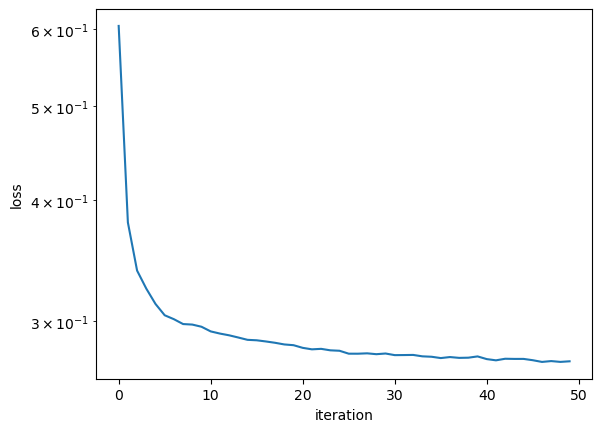

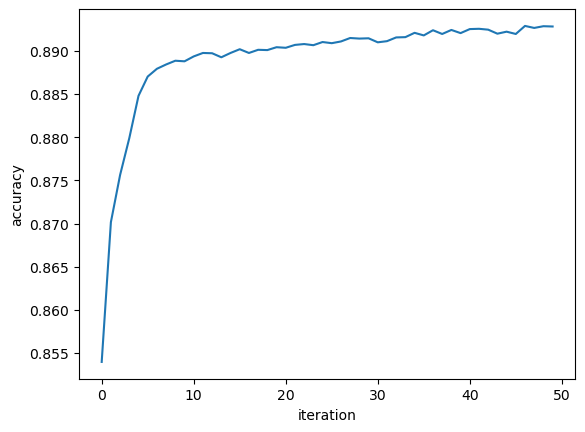

In [19]:
#plot loss curves and accuracy
plt.plot(history.history['loss'])
plt.yscale('log')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.show()

plt.plot(history.history['val_accuracy'])
plt.ylabel("accuracy")
plt.xlabel('iteration')
plt.show()



As expected, Loss decreases and the accuracy over the duration.  The final accuracy is approximately 0.9.

In [20]:
new_data = all_data[new_input_feats].copy()

df_new = pd.concat([new_data, target], axis=1)


In [21]:
#process new data
new_data  = sc.fit_transform(df_new[new_input_feats] )

# train - test split of dataset
train_data , test_data , train_target , test_target = model_selection.train_test_split (new_data ,target , test_size =0.3 , random_state = Answer_to_all_questions )


In [22]:



#define new parameters. Here we use more layers to increase complexity of the model
num_inputs = 9
num_nodes = 50
extra_depth=6
new_model = my_model(num_inputs , num_nodes , extra_depth)

In [23]:
#Using 200 epochs instead of 50 so that the earlystop is activated. With only 50 epochs the condition for earlystopping is not 
#reached

N_epochs = 200

callbacks_ = [
#stop training if not validation accuracy increase in 10 epochs
EarlyStopping ( verbose = True , patience =10 , monitor = 'val_accuracy'),
# Save model weights with the best accuracy
ModelCheckpoint ('model.h5' , monitor = 'val_accuracy',save_best_only = True , mode ='max')]
new_history = new_model.fit( train_data , train_target , batch_size = batchsize , epochs = N_epochs , \
verbose =1 , validation_data =( test_data , test_target ) , callbacks = callbacks_ )


Train on 70018 samples, validate on 30008 samples
Epoch 1/200
68000/70018 [============================>.] - ETA: 0s - loss: 0.6055 - accuracy: 0.6417

C:\Users\Theo\Anaconda3\envs\daml\lib\site-packages\keras\engine\training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


70018/70018 [==============================] - 1s 21us/sample - loss: 0.5973 - accuracy: 0.6487 - val_loss: 0.3208 - val_accuracy: 0.8818
Epoch 2/200
70018/70018 [==============================] - 1s 13us/sample - loss: 0.2857 - accuracy: 0.8980 - val_loss: 0.2639 - val_accuracy: 0.9037
Epoch 3/200
70018/70018 [==============================] - 1s 13us/sample - loss: 0.2207 - accuracy: 0.9220 - val_loss: 0.1927 - val_accuracy: 0.9346
Epoch 4/200
70018/70018 [==============================] - 1s 12us/sample - loss: 0.1968 - accuracy: 0.9311 - val_loss: 0.1850 - val_accuracy: 0.9367
Epoch 5/200
70018/70018 [==============================] - 1s 12us/sample - loss: 0.1922 - accuracy: 0.9336 - val_loss: 0.1839 - val_accuracy: 0.9369
Epoch 6/200
70018/70018 [==============================] - 1s 11us/sample - loss: 0.1911 - accuracy: 0.9333 - val_loss: 0.1904 - val_accuracy: 0.9339
Epoch 7/200
70018/70018 [==============================] - 1s 13us/sample - loss: 0.1905 - accuracy: 0.9341 - va

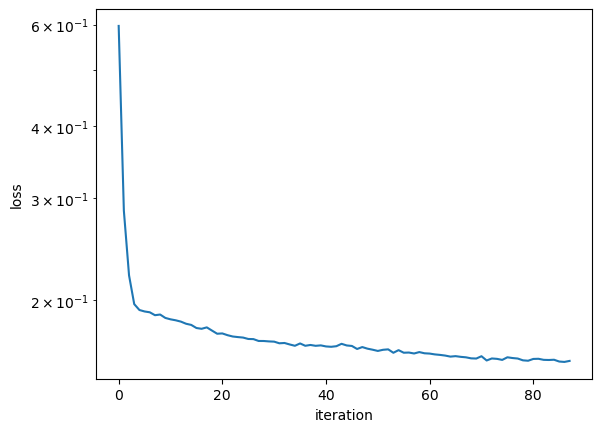

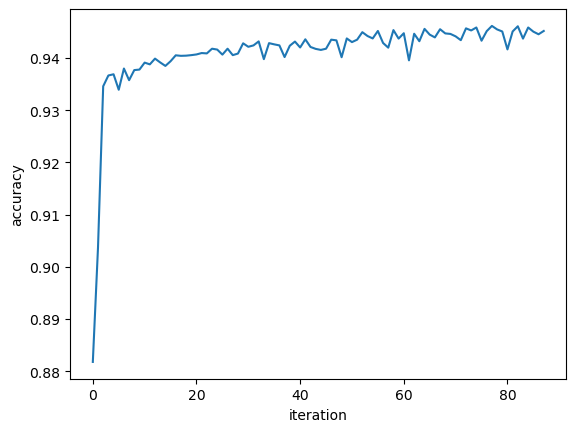

In [24]:
#plot loss and accuracy curves
plt.plot(new_history.history['loss'])
plt.yscale('log')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.show()

plt.plot(new_history.history['val_accuracy'])
plt.ylabel("accuracy")
plt.xlabel('iteration')
plt.show()

This is definitely an improvement over the previous model. Here the accuracy reaches ~ 0.95 compared to the ~0.9 from the previous model.

In [25]:
#get redicted categories
predict = (new_model.predict(test_data))


C:\Users\Theo\Anaconda3\envs\daml\lib\site-packages\keras\engine\training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [26]:
#convert probabilities into discrete 1 or 0
predict[predict>=0.5] = 1
predict[predict<0.5] = 0


<Figure size 640x480 with 0 Axes>

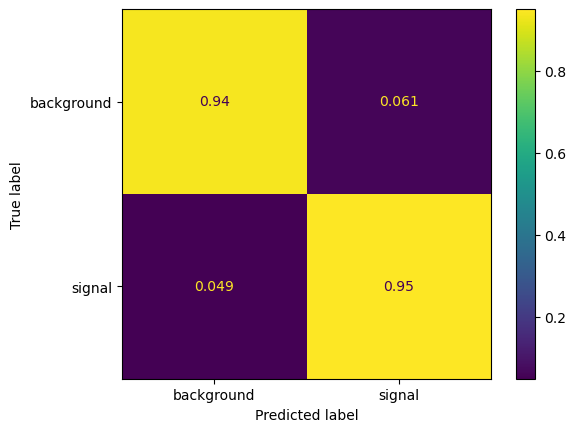

In [27]:
#plot confusion matrix 
fig = plt.figure()
matrix = confusion_matrix(
    test_target,predict,normalize='true')
confplot = ConfusionMatrixDisplay(matrix, display_labels=(('background'),('signal')))

confplot.plot()

This demonstates that the model performs well. 96% of the time true signal events are predicted as signal events, and 93% of the time true background events are predicted as background events.

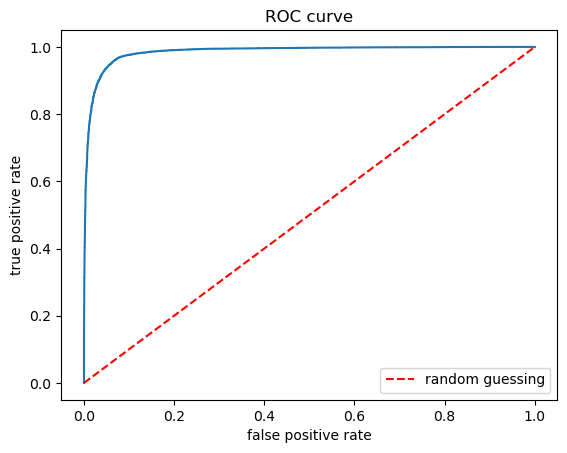

In [28]:
#Get the predicted categories as probabilities for the ROC curve
cont_pred = new_model.predict(test_data) 

#calculate false positive rate and true positive rate for ROC curve
fp_rate,tp_rate,thresholds = roc_curve(test_target,cont_pred)

#plot ROC curve
plt.plot(fp_rate,tp_rate)
plt.plot([0,1],[0,1],'--',c = 'red',label='random guessing') #plot reference line for "random guessing" 

plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

The optimal point is the one which maximises true positive rate and minimises false positive rate. This would be a point with a near 1 true positive rate and near 0 true negative rate, ie at the top left of the plot. To find this, I calculate the distance from the corner. The result I find is that the optimal point has a true positive rate of 0.95, and false negative rate of 0.06.

In [29]:
dist = np.sqrt(fp_rate**2 + (tp_rate-1)**2)

index =np.argmin(dist)  #minimise distance from upper left corner

fp_rate_optimal = fp_rate[index]
tp_rate_optimal = tp_rate[index]
print(fp_rate_optimal)
print(tp_rate_optimal)

0.05621953662282166
0.9469762490852238
